In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *

import matplotlib.pyplot as plt

np.random.seed(101)

In [2]:
parameters['i_end'] = 100
parameters

{'i_start': 0,
 'i_end': 100,
 'crop': ((-10, 10), (-10, 10), (0, 50)),
 'field_name': 'TracerBackground',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0
==> Cropping vtu files to ((-10, 10), (-10, 10), (0, 50))
Number of Locations after cropping :  1129
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/loc_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/time_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/data_TracerBackground.pkl


In [4]:
# Data for the regression
dim = 3
t = 100
X = loc_df.values #[I,:dim]
Y = data_df.values[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Y.shape

(1129, 1)

Setting the kernel

In [5]:
kernel = GPy.kern.Matern52(dim,ARD=False) + GPy.kern.White(dim)
model_gp = GPy.models.GPRegression(X,Y,kernel)
model_gp.optimize(messages=True, max_iters = 1000)


 /home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f69e83b70b8>]}

 /home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


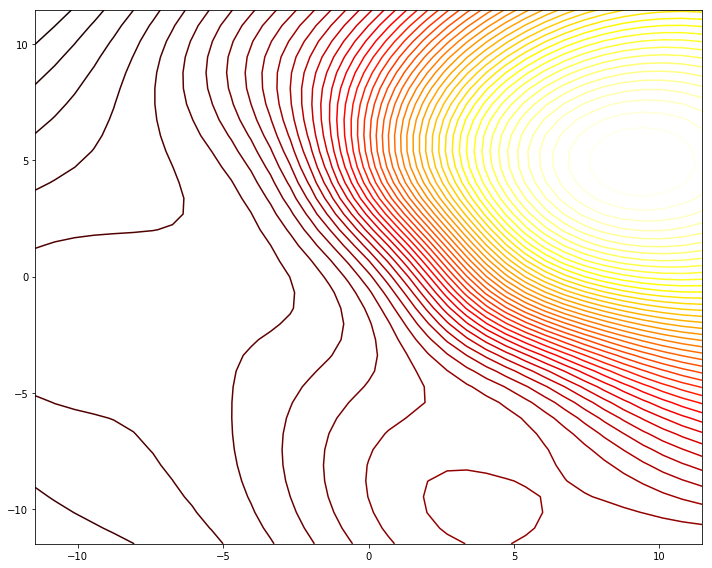

In [6]:
model_gp.plot_mean(visible_dims=[0,1],figsize=(10,8),levels=50)

## Sensor Optimisation

Define the Sets for the optimisation

In [7]:
n_V = X.shape[0]
sets = define_sets(n_V)

Number of sensors to place : 

In [8]:
k = 10

### Lazy Sensor Optimisation

In [9]:
sensor_loc_optimisation_lazy(k, sets, X, Y, model_gp)

array([ 800,  563,  183,  497, 1050,  196,  132,  142,  765,  100])

### Naive Sensor Optimisation

In [10]:
k = 10
sensor_loc_optimisation_naive(k, sets, X, Y, model_gp)

array([ 800,  563,  183,  497, 1050,  196,  132,  142,  765,  100])